In [1]:
#import library 
import os 
import zipfile
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator #untuk membuat image augmentation
from sklearn.model_selection import train_test_split #untuk lebih mudah split data training dan data testing
from tensorflow.keras.optimizers import RMSprop

In [2]:
#download dataset
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-22 12:30:18--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  7.84MB/s    in 53s     

2021-07-22 12:31:12 (5.81 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
#unzip dataset
zip_location = '/tmp/rockpaperscissors.zip'
unzip = zipfile.ZipFile(zip_location, 'r')
unzip.extractall('/tmp')
unzip.close()

In [4]:
#checking directories
origin_dir = '/tmp/rockpaperscissors'
os.listdir(origin_dir)

['README_rpc-cv-images.txt', 'paper', 'rock', 'rps-cv-images', 'scissors']

In [5]:
#making directories for training and validation data
train_dir = os.path.join(origin_dir, 'train')
val_dir = os.path.join(origin_dir, 'val')

In [6]:
#making directories for training and validation data
os.mkdir(train_dir)
os.mkdir(val_dir)
os.listdir(origin_dir)

['README_rpc-cv-images.txt',
 'paper',
 'rock',
 'rps-cv-images',
 'val',
 'scissors',
 'train']

In [7]:
#directory for each items
#origin 
rock_or_dir = os.path.join(origin_dir, 'rock')
paper_or_dir = os.path.join(origin_dir, 'paper')
scissors_or_dir = os.path.join(origin_dir, 'scissors')
#train 
rock_train = os.path.join(train_dir, 'rock')
paper_train = os.path.join(train_dir, 'paper')
scissors_train = os.path.join(train_dir, 'scissors')
#val 
rock_val = os.path.join(val_dir, 'rock')
paper_val = os.path.join(val_dir, 'paper')
scissors_val = os.path.join(val_dir, 'scissors')

In [8]:
#making all the directories above 
os.mkdir(rock_train)
os.mkdir(paper_train)
os.mkdir(scissors_train)
os.mkdir(rock_val)
os.mkdir(paper_val)
os.mkdir(scissors_val)

In [9]:
#training and validation data splitting 
rock_train_dir, rock_val_dir = train_test_split(os.listdir(rock_or_dir), test_size = 0.40)
paper_train_dir, paper_val_dir = train_test_split(os.listdir(paper_or_dir), test_size = 0.40)
scissors_train_dir, scissors_val_dir = train_test_split(os.listdir(scissors_or_dir), test_size = 0.40)

In [10]:
for file in rock_train_dir:
  shutil.copy(os.path.join(rock_or_dir, file), os.path.join(rock_train, file))
for file in paper_train_dir:
  shutil.copy(os.path.join(paper_or_dir,file), os.path.join(paper_train,file))
for file in scissors_train_dir:
  shutil.copy(os.path.join(scissors_or_dir,file), os.path.join(scissors_train,file))
for file in rock_val_dir:
  shutil.copy(os.path.join(rock_or_dir, file), os.path.join(rock_val, file))
for file in paper_val_dir:
  shutil.copy(os.path.join(paper_or_dir,file), os.path.join(paper_val,file))
for file in scissors_val_dir:
  shutil.copy(os.path.join(scissors_or_dir,file), os.path.join(scissors_val,file))

In [11]:
#Image Augmentation using Image Data Generator
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 15,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
)
test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 15,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size= 16,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size = (150,150),
    batch_size = 16,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [12]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)
result = model.fit(
  train_generator,
  epochs=16,
  validation_data=validation_generator,
  callbacks=[early_stop]
)

Epoch 1/16
82/82 [==============================] - 76s 912ms/step - loss: 1.1372 - accuracy: 0.5213 - val_loss: 0.6710 - val_accuracy: 0.7226
Epoch 2/16
82/82 [==============================] - 75s 909ms/step - loss: 0.4786 - accuracy: 0.8430 - val_loss: 0.2561 - val_accuracy: 0.9144
Epoch 3/16
82/82 [==============================] - 74s 905ms/step - loss: 0.2671 - accuracy: 0.9177 - val_loss: 0.2369 - val_accuracy: 0.9167
Epoch 4/16
82/82 [==============================] - 74s 908ms/step - loss: 0.2322 - accuracy: 0.9291 - val_loss: 0.1708 - val_accuracy: 0.9452
Epoch 5/16
82/82 [==============================] - 74s 905ms/step - loss: 0.2047 - accuracy: 0.9421 - val_loss: 0.1677 - val_accuracy: 0.9566
Epoch 6/16
82/82 [==============================] - 74s 901ms/step - loss: 0.1528 - accuracy: 0.9634 - val_loss: 0.1788 - val_accuracy: 0.9475
Epoch 7/16
82/82 [==============================] - 74s 904ms/step - loss: 0.1619 - accuracy: 0.9634 - val_loss: 0.1643 - val_accuracy: 0.9486

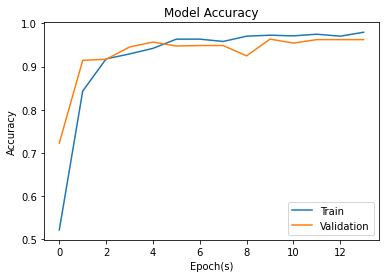

In [14]:
import matplotlib.pyplot as plt

acc = result.history['accuracy']
val_acc = result.history['val_accuracy']
plt.plot(acc)
plt.plot(val_acc)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch(s)')
plt.legend(['Train', 'Validation'])
plt.show()


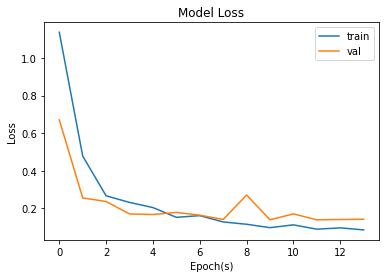

In [15]:
loss = result.history['loss']
val_loss = result.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch(s)')
plt.legend(['train', 'val'])
plt.show()

Saving 3bkC6JAPog7xX9WO.png to 3bkC6JAPog7xX9WO.png


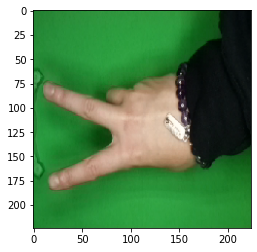

In [16]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt

%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224,224))
  imgplot = plt.imshow(img)


In [17]:
img = image.load_img(path, target_size=(150, 150))

In [18]:
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
images = np.vstack([img_batch])
classes = model.predict(images, batch_size=32)

if classes[0,0]!=0:
  print('THIS IS A PAPER')
elif classes[0,1]!=0:
  print('THIS IS A ROCK')
else:
  print('THIS IS A SCISSORS')

THIS IS A SCISSORS
